# Electricity vs Gas

## preleminaries

I imported the smarthome dataset with:

`python3 smartthings.py -d 'sqlite:///myhome.db'  'data/smartthings/smartthings.*'`

Also the p1e data set is required with:

`python3 p1e.py -r`

Finally, the p1g data set is required with:

`python3 p1g.py -d sqlite:///myhome2.db ./data/P1g`
## Overview
This report focuses on the electricity vs gas consumption. Main questions we will be adressing: 

* What is the distribution of the energy/gas usage each month?
* Are there weekly patterns in the energy usage?

First energy and gas will be explored generally to get a feel for the data. Afterwards we will focus more on the exact consumption per interval.

## Part 1: Electricity

### Overview of the data
For start there will be a quick look at the electricity data to get an overal idea of the distribution of total electricity consumption. The dataset examined includes cumulative data from April 2022 to April 2024. In the following plot we examine the total electricity consumption per month. The difference between the 'imported T1' line and the 'imported T2' line is the difference in tariff, with 'imported T1' representing the total energy usage in low-cost hours, and 'imported T2' representing the total energy usage in high-cost hours. Between this time period, there seems to be an overal gradual increase in total energy usage. However, there seems to be a dip around March of 2023. Since this data captures electricity usage from a single-family house, it is probable that the owners have a child in school, therefore, this decrease in March could result from a Spring Break vacation away from the house.

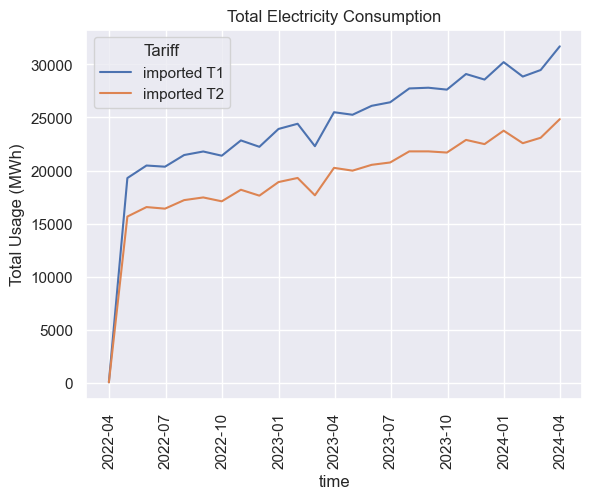

In [1]:
from report_electricity_usage import ReportElcUsage
report = ReportElcUsage()
report.figure1()

### Graph Insights
Generally, more energy is consumed in this household throughout the years. This is likely due to aquiring more items that require electricity during these years, which is a standard experience and therefore, this increase is not a surprise. Furthermore, with the increase in gas prices in the Netherlands over these years, homeowners are encouraged to use more electicity, as energy prices as the energy tax actually decreased during these years. However, the dip in 2023 is interesting. Lets see in the context of one year how different the consumption per month is. The data is plotted in a high tarif bar and a low tarif bar per month, with blue being the energy consumed during low-cost hours, and orange being the energy consumed during high-cost hours. Since each bar is the cumulative energy consumption per month, the time label for each bar represents the last day of each month. 

### Looking at 2023

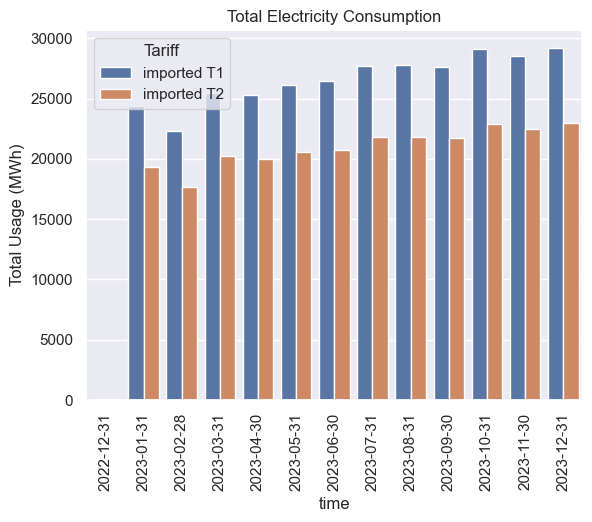

In [2]:
report.figure2()

### Graph Findings
The decrease in energy consumption seems to begin at the end of February, and then slowly starts to rise throughout the month of March. Overall, energy consumption continues to gradually increase after March for tariff levels. 

### Table of March
To further investigate this decrease in energy consumption in March, lets query data only for the month March and extract each day's energy usage. First we will look at the data for March, then we will compare it to the data for one of the higher electricity usage months, October. This comparision will also be interesting because these months are mirrors of each other in the year; March is the third month of the year, and October is the third to last month of the year. 

In [2]:
report.march_table()
report.oct_table()

            imported T1  exported T1  imported T2  exported T2
time                                                          
2023-02-28    33941.137          0.0    26911.772          0.0
2023-03-01   814716.477          0.0   646281.464          0.0
2023-03-02   815002.210          0.0   647180.982          0.0
2023-03-03   815229.521          0.0   647881.400          0.0
2023-03-04   815806.806          0.0   648326.304          0.0
2023-03-05   817356.389          0.0   648326.304          0.0
2023-03-06   818138.016          0.0   648593.688          0.0
2023-03-07   818410.883          0.0   649300.405          0.0
2023-03-08   818699.135          0.0   650104.831          0.0
2023-03-09   819043.233          0.0   650957.993          0.0
2023-03-10   819322.748          0.0   651456.655          0.0
2023-03-11   819972.323          0.0   651863.328          0.0
2023-03-12   821460.829          0.0   651863.328          0.0
2023-03-13   822131.062          0.0   652291.059      

### March Table Findings
The data from this table confirms that the energy usage from March starts off low, then generally increases each day. There are a few exception days where the energy usage is significantly lower, like March 26th and March 30, which could represent days when no one was at the house and only the appliances that left on were using electricity. Compared to October, the energy consumption for March is significanlty lower, which could mainly be a result of differences in weather. The weather in March starts off colder, but gradually gets warmer towards the end of the month with the transition into Spring, while October is the opposite, with warmer, Autumn weather starting off the month followed by colder winter temperatures. Furthermore, the schedule of sunrise and sunset during these months can dictate how long lights are turned on in the house and make significant differences in energy usage. To further investigate this difference, lets check the motion levels detected for each month. 

### Total Movement on the Ground Level

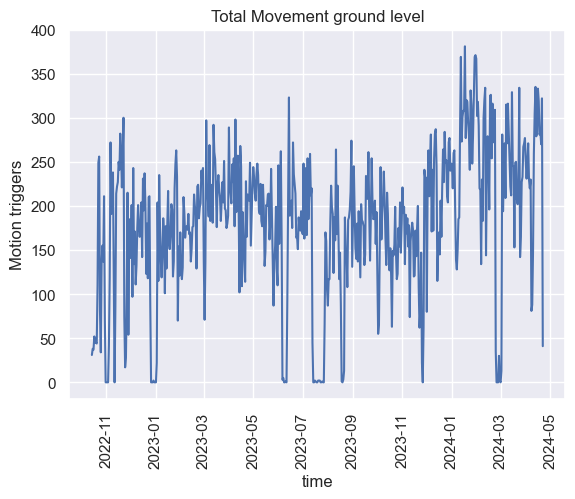

In [2]:
report.motion()                         

### Graph Findings
There are multiple instances where there is zero movement detected in 2023, and these days look to occur in the months of January, June, July, August, and November. With as low of an energy usage level March had in 2023, I would expect there to be days of zero motion triggers, but the number of motion triggers for March actually hovers between 75 and 300 instances. On the other hand, it is not suprising there there were no days in October with zero motion triggers because of the high levels of electricity usage during this month. In fact, the number of alerts during October never drops below 50, which must mean that people were constantly home and moving around during this month. While this graph's findings align with our original assumptions for the month of October, we cannot say the same for the month of March. Hence. lets look at the weather report through these 19 months and compare March to October one last time to determine what the main factor of electricity usage is. 

### Weather 
Using the 'openweathermap.py' file, we can pull up hourly weather reports from March and October. I have decided to extract the maximum temperature of each day per month and graph them on a lineplot so I can see how the temperatures varied from day to day, and compare these patterns for each month. 

### For March values, import the dataset with `python3 openweathermap.py -d sqlite:///myhome.db 2023-03-01 2023-03-31`

In [16]:
import openweathermap
import sqlalchemy as sa
import pandas as pd
import seaborn as sns

engine = sa.create_engine("sqlite:///myhome.db")
sql = sa.text("SELECT * FROM openweathermap")
march_temps = pd.read_sql(sql, con=engine)
march_temps.dropna(axis=0, inplace=True)

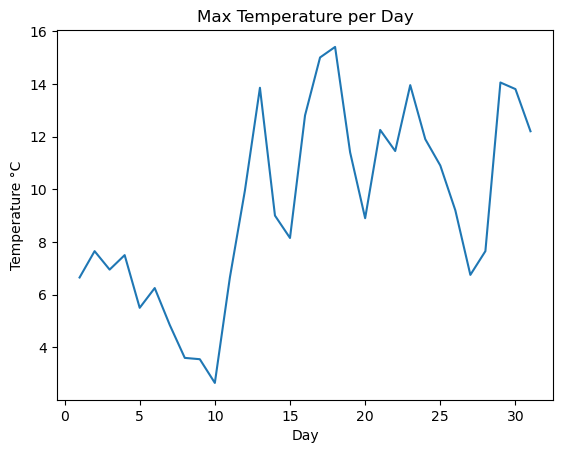

Average temp in  March :  9.3661289599634


In [11]:
from report_electricity_usage import ReportElcUsage
report = ReportElcUsage()
report.temps(march_temps, "March") 

### For October values, import the dataset with `python3 openweathermap.py -d sqlite:///myhome.db 2023-10-01 2023-10-31`

In [15]:
engine = sa.create_engine("sqlite:///myhome.db")
sql = sa.text("SELECT * FROM openweathermap")
oct_temps = pd.read_sql(sql, con=engine)
oct_temps.dropna(axis=0, inplace=True)

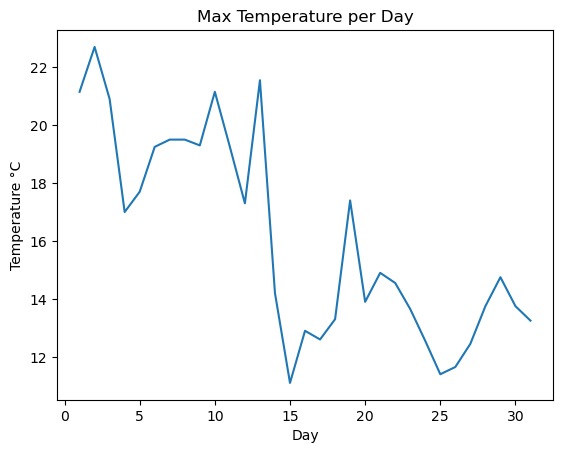

Average temp in  October :  16.074193431485085


In [14]:
from report_electricity_usage import ReportElcUsage
report = ReportElcUsage()
report.temps(oct_temps, "October")

### Weather Findings
The March and October graphs of max temperatures per day are almost mirror images of each other. March temperatures start low at the beginning of the month, then once they hit a minimum they shoot up into double digits, then hover between 8°C and 16°C until the end of the month, with the average temperature for this month being 9.37°C. On the other hand, October starts off with warmer temperatures at the begining of the month, then half way through the month, temperatures drop significantly and never exceed 18°C for the rest of the month, with the average temperature for this month being 16.07°C. I would think that with colder temperatures in March, and since the sun sets earlier, more energy would be used as lights would be turn on longer and more heaters/appliances would be used since it is not particularly nice to be outside that often. But since this is not the case, I do not think that weather has much to do with the changes in electricity consumption throughout the year. Perhaps energy usage is based on different outside factors; lets look at electricity consumption for 2022 and 2024 to see if it matches the same trend as 2023.

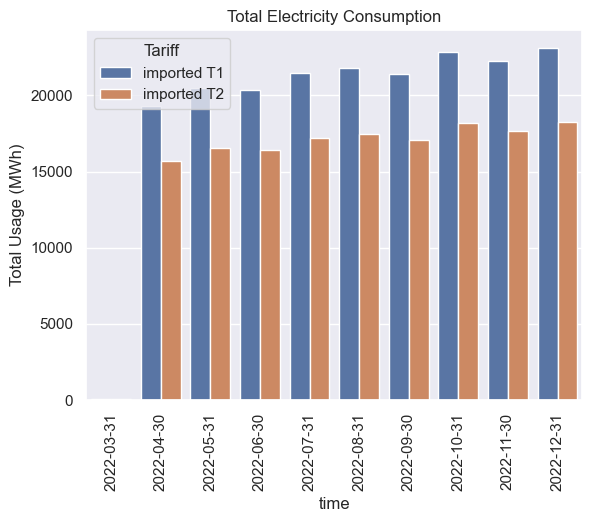

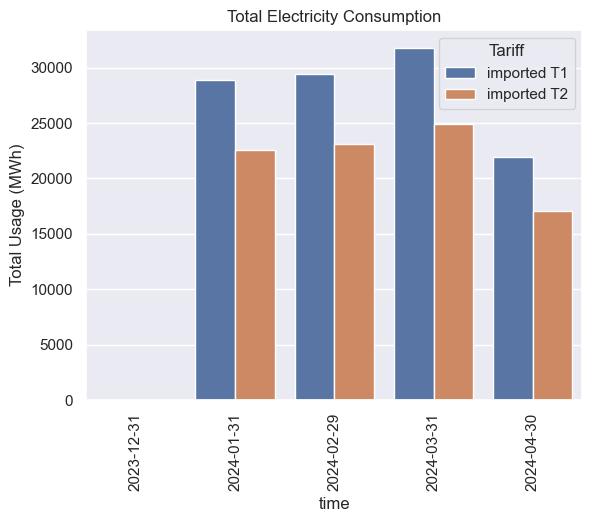

In [2]:
report.figure3()
report.figure4()

### Yearly Trends
Both the end of 2022 and the beginning of 2024 have similar energy consumption trends compared to 2023. In 2022, increases in energy use occur with each passing month, and in 2024, the same trend is starting to form as well. April of 2024 might be an exception month like March in 2023, but this decrease actually aligns with the period of low motion trigger numbers, which could mean during April of 2024, the family was away from the house more often than other months, hence energy usage was lower. As for the trend in higher amounts of energy consumption towards the end of each year, my mind then goes to TV usage, which can be dictated by which professional sports are in season, or when other popular game shows or reality TV shows air. In the Netherlands, popular sports like futbol, tennis, and field hockey are all played through the months of August to December, which can equate to higher rates of TV screens being on in houses, ultimately increasing the use of electricity sockets being used. Furthermore, energy consumption can possibly stem from the fact that the end of the year is filled with holidays, which promotes larger gatherings and therefore, more time for appliances to be used.

### Weekly Trends
Lets finally look at weekly trends to see which day of the week most often correlates with the most energy used. I'm going to compare the months of Januray and December of 2023 to see if there is a difference in trends between the beginning of the year and the end. In 2023, Janurary started on a Sunday and December started on a Friday.

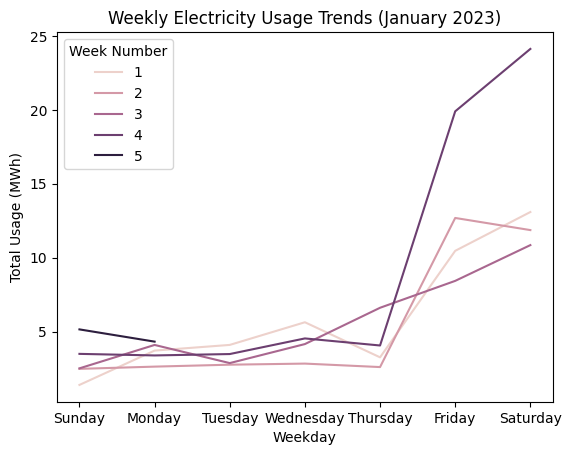

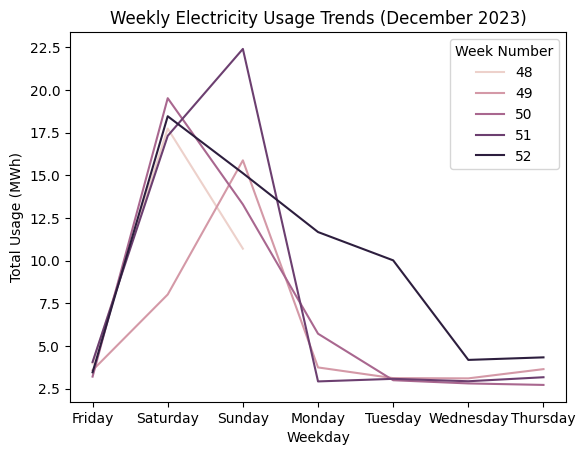

In [1]:
from report_electricity_usage import ReportElcUsage
report = ReportElcUsage()
report.jan_table()
report.dec_table()

For the most part, the weekly trends in January and December are the same. On weekdays (Monday through Thursday), electricity usage remains relatively low, then once the weekend arrives, the electricity usage levels increase drastically and hit a peak most often on Saturdays. For both months, the highest electricity usage levels are seen during the third complete week of the month, but it is interesting to see that the peak energy usage for this week is on a Saturday in January and a Sunday in December. Furthermore, in January, energy usage levels start to increase as early as Thursday, whereas in December, energy usage levels do not see a significant increase until Friday. This could be due to the difference in working patterns from the beginning of the year versus the end of the year. For example, end of year deadlines could play a factor in hour long the homeowners in this dataset are away from the house on Fridays. Compared to the beginning of the year, work could potentially be more relaxed and therefore, these homeowners might have more opportunities to take Friday off and spend more time at home. 

## Part 2: Gas Usage
Now lets look at the gas consumption data. This dataset also includes cumulative data from April 2022 to April 2024. In the following plot we examine the total gas consumption per month in this household. Unlike the electricity consumption data, there seems to be a less clear pattern for how much gas is consumed during this time period. The largest peaks of total usage levels occur in November 2022, January 2023, and May 2023. A more in depth analysis regarding the most important factors for the rise and fall of gas consumption can be found in `report_temperature_switch.ipynb`

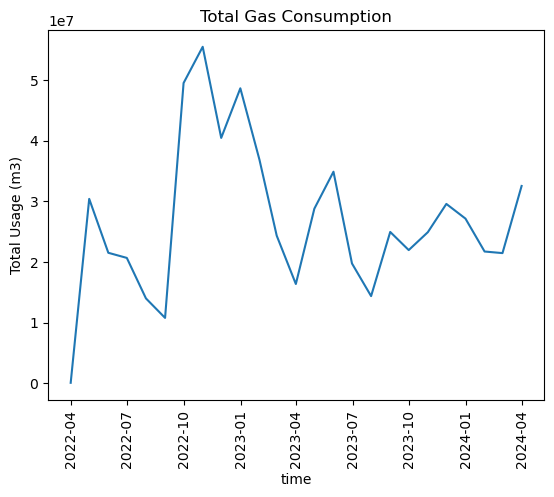

In [1]:
from report_electricity_usage import ReportGasUsage
from functions import create_timestamp, df_timestamp_index
report = ReportGasUsage()
report.figure1()